In [2]:
from medoid_lib import api
from medoid_lib.dtw_lib._dtw_lib import fastdtw
f = lambda x, y: fastdtw(x, y, 1)[0]

In [3]:
limit = 50
all_activities = api.load(['medoid/data/all_activities'])[0]
check_limit = lambda x, y: len(api.load(['medoid/data/user' + str(y) + '_' + x + '_matrix_5'])[0]) > limit
user1_activity = list(filter(lambda x: check_limit(x, 1), all_activities[1]))
user2_activity = list(filter(lambda x: check_limit(x, 2), all_activities[2]))

In [4]:
user1_matrix_name = list(map(lambda x: 'medoid/data/user1_' + x + '_matrix_5', user1_activity))
user1_segs_name = list(map(lambda x: 'medoid/data/user1_' + x + '_segments_5', user1_activity))
user1_matrices = api.load(user1_matrix_name)
user1_segs = api.load(user1_segs_name)
user2_matrix_name = list(map(lambda x: 'medoid/data/user2_' + x + '_matrix_5', user2_activity))
user2_segs_name = list(map(lambda x: 'medoid/data/user2_' + x + '_segments_5', user2_activity))
user2_matrices = api.load(user2_matrix_name)
user2_segs = api.load(user2_segs_name)

In [298]:
get_multi = lambda x, y: [v for idx, v in enumerate(x) if idx in y]

def form_new_matrices(indices, matrix):
    length = len(indices)
    new_matrix = get_multi(matrix, indices)
    new_matrix = list(map(lambda x: get_multi(x, indices), new_matrix))
    return new_matrix

def split_data(matrix, segs, prob):
    import random
    size = len(matrix)
    indices = list(range(size))
    test_indices = random.sample(indices, int(prob * size))
    train_indices = [i for i in indices if i not in test_indices]
    test_segs = get_multi(segs, test_indices)
    test_matrix = form_new_matrices(test_indices, matrix)
    train_segs = get_multi(segs, train_indices)
    train_matrix = form_new_matrices(train_indices, matrix)
    return (train_matrix, train_segs), (test_matrix, test_segs)

In [186]:
user1_data = list(map(lambda x: split_data(x[0], x[1], 0.2), zip(user1_matrices, user1_segs)))
user1_train = [x[0] for x in user1_data]
user1_train_matrix, user1_train_seg = [], []
for i in user1_train:
    user1_train_matrix.append(i[0])
    user1_train_seg.append(i[1])

In [187]:
user1_test = [x[1] for x in user1_data]
user1_test_matrix, user1_test_segs = [], []
for i in user1_test:
    user1_test_matrix.append(i[0])
    user1_test_segs.append(i[1])

In [247]:
user1_represents = api.get_multi_represents(user1_train_matrix, user1_train_seg, user1_activity, f, debug=True)

Walking
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 215, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296], [71, 72, 73, 160, 161, 162, 166, 167, 257, 258, 259, 260, 261, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314

In [299]:
import random
user1_test_segs = []
user1_test_labels = []
all_segs = [x[1][1] for x in user1_data]
for i in range(len(all_segs)):
    user1_test_segs.extend(all_segs[i])
    user1_test_labels.extend([user1_activity[i] for _ in range(len(all_segs[i]))])

In [64]:
# random.shuffle(user1_test_data)
user1_test_segs = [x[0] for x in user1_test_data]
user1_test_labels = [x[1] for x in user1_test_data]

In [65]:
test_data = [[] for _ in range(6)]
test_data_label = [[] for _ in range(6)]
for i in range(len(user1_activity)):
    for j in range(len(user1_test_labels)):
        if user1_test_labels[j] == user1_activity[i]:
            test_data[i].append(user1_test_segs[j])
            test_data_label[i].append(user1_test_labels[j])

In [251]:
import importlib
importlib.reload(api)

<module 'medoid_lib.api' from '/home/t/tianyang/curantis/medoid/medoid_lib/api.py'>

two times calculation for training matrix

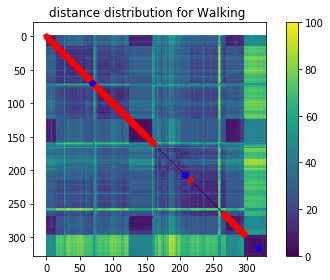

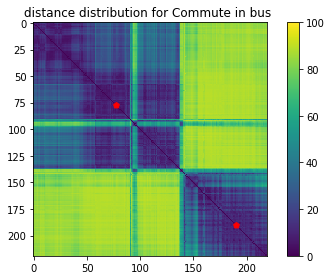

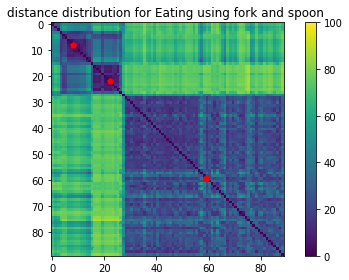

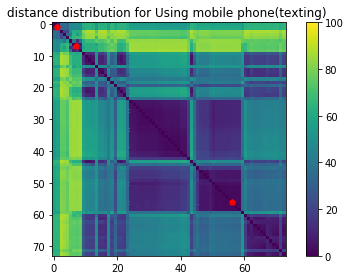

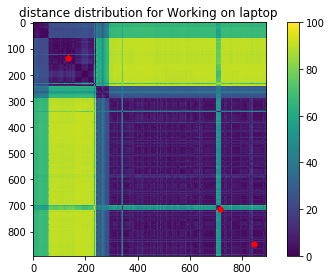

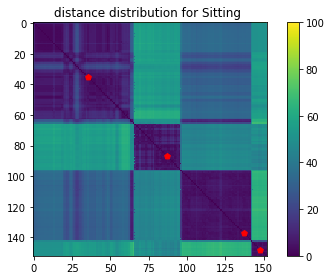

In [257]:
# the one use currently
api.plot_matrix(user1_train_matrix[0], user1_activity[0], mark2=[69, 207, 316], mark=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 215, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296])
api.plot_matrix(user1_train_matrix[1], user1_activity[1], mark=[77, 190])
api.plot_matrix(user1_train_matrix[2], user1_activity[2], mark=[59, 8, 22])
api.plot_matrix(user1_train_matrix[3], user1_activity[3], mark=[1, 7, 56])
api.plot_matrix(user1_train_matrix[4], user1_activity[4], mark=[847, 135, 715])
api.plot_matrix(user1_train_matrix[5], user1_activity[5], mark=[137,148,87,35])

In [320]:
def get_user1_all_activity_test():
    # get train and test data
    user1_data = list(map(lambda x: split_data(x[0], x[1], 0.2), zip(user1_matrices, user1_segs)))
    user1_train = [x[0] for x in user1_data]
    user1_train_matrix, user1_train_seg = [], []
    for i in user1_train:
        user1_train_matrix.append(i[0])
        user1_train_seg.append(i[1])
    user1_test = [x[1] for x in user1_data]
    user1_test_matrix, user1_test_segs = [], []
    for i in user1_test:
        user1_test_matrix.append(i[0])
        user1_test_segs.append(i[1])
    user1_represents = api.get_multi_represents(user1_train_matrix, user1_train_seg, user1_activity, f, debug=False)
    for i in range(6):
        predict = []
        for seg in user1_test_segs[i]:
            classification = api.classify(user1_represents, seg, f, 10)
            predict.append(classification)
        print(user1_activity[i])
        print(len(predict))
        print('top =================> 1')
        result = []
        for j in range(len(predict)):
            result.append(user1_activity[i] in predict[j][:1])
        print(np.mean(result))
        print('top =================> 3')
        result = []
        for j in range(len(predict)):
            result.append(user1_activity[i] in predict[j][:3])
        print(np.mean(result))
        print('top =================> 5')
        result = []
        for j in range(len(predict)):
            result.append(user1_activity[i] in predict[j][:5])
        print(np.mean(result))

In [309]:
for _ in range(5):
    get_user1_all_activity_test()
    print('#*#*#*#*#*#*#*#*#*#*#*#*#*#')

Walking
81
top = 1
0.9135802469135802
top = 3
0.9506172839506173
top = 5
0.9753086419753086
Commute in bus
54
top = 1
0.5370370370370371
top = 3
0.9629629629629629
top = 5
0.9814814814814815
Eating using fork and spoon
22
top = 1
0.36363636363636365
top = 3
1.0
top = 5
1.0
Using mobile phone(texting)
18
top = 1
0.6111111111111112
top = 3
0.9444444444444444
top = 5
1.0
Working on laptop
223
top = 1
0.8340807174887892
top = 3
0.9327354260089686
top = 5
0.9372197309417041
Sitting
38
top = 1
0.7105263157894737
top = 3
0.868421052631579
top = 5
0.9210526315789473


KeyboardInterrupt: 

In [338]:
def get_user2_all_activity_test():
    user2_data = list(map(lambda x: split_data(x[0], x[1], 0.2), zip(user2_matrices, user2_segs)))
    user2_train = [x[0] for x in user2_data]
    user2_train_matrix, user2_train_seg = [], []
    for i in user2_train:
        user2_train_matrix.append(i[0])
        user2_train_seg.append(i[1])
    user2_represents = api.get_multi_represents(user2_train_matrix, user2_train_seg, user2_activity, f)
    user2_test = [x[1] for x in user2_data]
    user2_test_matrix, user2_test_segs = [], []
    for i in user2_test:
        user2_test_matrix.append(i[0])
        user2_test_segs.append(i[1])
    for i in range(6):
        predict = []
        for seg in user2_test_segs[i]:
            classification = api.classify(user2_represents, seg, f, 10)
            predict.append(classification)
        print(user2_activity[i])
        print(len(predict))
        print('top = 1')
        result = []
        for j in range(len(predict)):
            result.append(user2_activity[i] in predict[j][:1])
        print(np.mean(result))
        print('top = 3')
        result = []
        for j in range(len(predict)):
            result.append(user2_activity[i] in predict[j][:3])
        print(np.mean(result))
        print('top = 5')
        result = []
        for j in range(len(predict)):
            result.append(user2_activity[i] in predict[j][:5])
        print(np.mean(result))


In [ ]:
get_user2_all_activity_test()

/home/t/tianyang/curantis/medoid/medoid_lib/api.py:272: RuntimeWarning: divide by zero encountered in double_scalars
  dis_f = lambda rep: distance(rep[0], seg) / rep[1]


Walking
52
top = 1
0.9423076923076923
top = 3
1.0
top = 5
1.0
Working on laptop
125
top = 1
0.72
top = 3
0.872
top = 5
0.968
Standing
13
top = 1
0.6153846153846154
top = 3
1.0
top = 5
1.0
Jogging
27
top = 1
1.0
top = 3
1.0
top = 5
1.0


In [326]:
    user2_data = list(map(lambda x: split_data(x[0], x[1], 0.2), zip(user2_matrices, user2_segs)))
    user2_train = [x[0] for x in user2_data]
    user2_train_matrix, user2_train_seg = [], []
    for i in user2_train:
        user2_train_matrix.append(i[0])
        user2_train_seg.append(i[1])
    user2_represents = api.get_multi_represents(user2_train_matrix, user2_train_seg, user2_activity, f)
    user2_test_segs = []
    user2_test_labels = []
    all_segs = [x[1][1] for x in user2_data]
    for i in range(len(all_segs)):
        user2_test_segs.extend(all_segs[i])
        user2_test_labels.extend([user2_activity[i] for _ in range(len(all_segs[i]))])
    user2_test_data = list(zip(user2_test_segs, user2_test_labels))

In [324]:
user2_activity[1]

'Working on laptop'

In [331]:
len(user2_test_segs)

617

In [126]:
api.evaluate(user2_test_segs[1], user2_test_labels[1], user2_represents, f, top=1, debug=True)


  0%|          | 0/617 [00:00<?, ?it/s]/home/t/tianyang/curantis/medoid/medoid_lib/api.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  dis_f = lambda rep: distance(rep[0], seg) / rep[1]

 50%|████▉     | 306/617 [02:35<02:46,  1.87it/s]


100%|█████████▉| 614/617 [05:11<00:01,  1.97it/s]


100%|██████████| 617/617 [05:13<00:00,  1.98it/s]

0.20907617504051865

In [127]:
api.evaluate(user2_test_segs, user2_test_labels, user2_represents, f, top=3)


 50%|█████     | 309/617 [02:36<02:34,  1.99it/s]


100%|██████████| 617/617 [05:11<00:00,  1.99it/s]

0.7893030794165316

In [128]:
api.evaluate(user2_test_segs, user2_test_labels, user2_represents, f, top=5)


 50%|█████     | 309/617 [02:36<02:34,  1.99it/s]


100%|██████████| 617/617 [05:12<00:00,  1.99it/s]

0.9773095623987034